## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
print (tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Checking the floders present 
!ls "/content/drive/My Drive/DogBreed_Classification"

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path +'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path +'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path +'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd 
label = pd.read_csv('/content/labels.csv')


In [10]:
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = label.breed.value_counts()

In [12]:
print ('total number of different breed given are ',breed_count.shape)
breed_count

total number of different breed given are  (120,)


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
int_encoder = label_encoder.fit_transform(label['breed'])
print(int_encoder)

[19 37 85 ...  3 75 28]


In [0]:
import tensorflow.keras as keras

int_encoder_one_hot = tf.keras.utils.to_categorical(int_encoder,num_classes=None, dtype='int')

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [16]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

for f, img in tqdm (label.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows,img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 10222/10222 [00:30<00:00, 329.88it/s]


In [0]:
import numpy as np
y_array = label_encoder.transform(y_feature)

y_cat = tf.keras.utils.to_categorical(y_array,num_classes=None, dtype='int')

In [18]:
y_cat.shape

(10222, 120)

In [0]:
x_feature_array = np.array(x_feature)

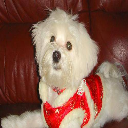

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0] 
 73 
 maltese_dog


In [20]:
# Checking images and their labels
from google.colab.patches import cv2_imshow
img = cv2_imshow(x_feature_array[12])
print (y_cat[12],'\n',y_array[12],'\n',y_feature[12])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_norm = x_feature_array/255


In [0]:
x_dim = np.array(tf.keras.backend.expand_dims(
    x_norm,
    axis=1
))

In [23]:
x_dim[1,:].shape

(1, 128, 128, 3)

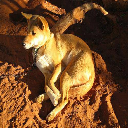

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0] 
 37 
 dingo


In [24]:
# checking the images and labels
img = cv2_imshow(x_feature_array[1])
print (y_cat[1],'\n',y_array[1],'\n',y_feature[1])

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(x_feature_array, y_cat, test_size=0.2, random_state=1)

In [27]:
print ('shape of X train data', X_train.shape,  '\n ', ' shape of X val data ', X_val.shape)

shape of X train data (8177, 128, 128, 3) 
   shape of X val data  (2045, 128, 128, 3)


In [28]:
print ('shape of y train data', y_train.shape,  '\n ', ' shape of y val data ', y_val.shape)

shape of y train data (8177, 120) 
   shape of y val data  (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_submission_data = pd.read_csv ('/content/sample_submission.csv')

In [0]:
test_img = sample_submission_data.id

In [31]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [32]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:18<00:00, 566.52it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature_array = np.array(x_test_feature)


In [0]:
x_test_feature_array_norm = x_test_feature_array/255

In [0]:
#x_test_feature_array_norm_4d =  np.array(tf.keras.backend.expand_dims(
    #x_test_feature_array_norm,
   # axis=-1
#))

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Activation,Reshape,MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()


In [0]:
# Sequential
model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (5, 5), padding='same',input_shape=(img_rows,img_cols,3,)))
model.add(Activation('relu'))

#normalize data
model.add(BatchNormalization())

# 2nd CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Batcth normalizing
model.add(BatchNormalization())


In [0]:
# Flattening the layer 
model.add(Flatten())

# Dens layer 
model.add(Dense(256,activation ='relu'))
# Drop out 
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(120,activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Specify Loass and Optimizer
#opt = Adam(lr =0.5)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0

In [0]:
# CallBacks 
mckpt = tf.keras.callbacks.ModelCheckpoint('./dog_breed.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [43]:
history = model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=128, callbacks=[mckpt],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 18s 2ms/sample - loss: 13.7098 - accuracy: 0.0098 - val_loss: 52.7864 - val_accuracy: 0.0112
Epoch 2/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.9153 - accuracy: 0.0158 - val_loss: 5.5988 - val_accuracy: 0.0103
Epoch 3/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.9054 - accuracy: 0.0143 - val_loss: 5.0589 - val_accuracy: 0.0093
Epoch 4/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.9779 - accuracy: 0.0176 - val_loss: 5.0203 - val_accuracy: 0.0093
Epoch 5/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.8404 - accuracy: 0.0186 - val_loss: 4.9804 - val_accuracy: 0.0098
Epoch 6/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7627 - accuracy: 0.0204 - val_loss: 4.9439 - val_accuracy: 0.0093
Epoch 7/10
8177/8177 [==============================] - 10s 1ms/samp

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#Define some parameters
#img_size = 128
#img_depth = 3


In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Build training generator. 
train_generator = img_generator.flow(X_train,y_train,batch_size=128)

In [0]:

#Build test generator
val_generator = img_generator.flow(X_val,y_val,batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('./dogcnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [48]:
model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch= X_train.shape[0]//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = X_val.shape[0]//128, #Number of test images//batch_size
                    callbacks=[model_checkpoint],workers=4
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 15 steps
Epoch 1/10
63/63 [==============================] - 26s 410ms/step - loss: 4.7907 - accuracy: 0.0118 - val_loss: 4.7907 - val_accuracy: 0.0099
Epoch 2/10
63/63 [==============================] - 26s 414ms/step - loss: 4.7779 - accuracy: 0.0117 - val_loss: 4.7833 - val_accuracy: 0.0099
Epoch 3/10
63/63 [==============================] - 26s 412ms/step - loss: 4.7831 - accuracy: 0.0106 - val_loss: 4.7834 - val_accuracy: 0.0099
Epoch 4/10
63/63 [==============================] - 25s 396ms/step - loss: 4.7771 - accuracy: 0.0117 - val_loss: 4.7851 - val_accuracy: 0.0099
Epoch 5/10
63/63 [==============================] - 25s 396ms/step - loss: 4.7814 - accuracy: 0.0113 - val_loss: 4.7850 - val_accuracy: 0.0099
Epoch 6/10
63/63 [==============================] - 25s 396ms/step - loss: 4.7767 - accuracy: 0.0119 - val_loss: 4.7828 - val_accuracy: 0.0099
Epoch 7/10
63/63 [==============================] 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/ANN DL/Project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [50]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
preds=Dense(120,activation='softmax')(x)

In [0]:
from tensorflow.keras.models import Model
model_vgg=Model(inputs=base_model.input,outputs=preds)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [53]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_vgg.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_vgg.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d
False
flatten_1
False
dense_2
True
dense_3
True
dense_4
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [54]:
from tensorflow.keras.optimizers import RMSprop

#opt = Adam(lr=0.01)
model_vgg.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
mckpt_vgg = tf.keras.callbacks.ModelCheckpoint('./dog.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [56]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=10,validation_data=(X_val,y_val),
                    callbacks=[mckpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 11s 1ms/sample - loss: 4.7167 - accuracy: 0.0755 - val_loss: 3.7087 - val_accuracy: 0.1472
Epoch 2/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 2.9694 - accuracy: 0.2708 - val_loss: 2.7689 - val_accuracy: 0.2939
Epoch 3/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 2.1302 - accuracy: 0.4230 - val_loss: 2.4966 - val_accuracy: 0.3584
Epoch 4/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 1.6632 - accuracy: 0.5297 - val_loss: 2.6688 - val_accuracy: 0.3579
Epoch 5/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 1.3301 - accuracy: 0.6198 - val_loss: 2.6481 - val_accuracy: 0.3785
Epoch 6/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 1.0048 - accuracy: 0.6935 - val_loss: 2.9055 - val_accuracy: 0.3751
Epoch 7/10
8177/8177 [==============================] - 9s 1ms/sample - los

In [57]:
# Trying model for 10 more itration
model_vgg.fit(X_train,y_train,
                    epochs=10,validation_data=(X_val,y_val),
                    callbacks=[mckpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.3017 - accuracy: 0.9055 - val_loss: 4.3544 - val_accuracy: 0.3623
Epoch 2/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2653 - accuracy: 0.9160 - val_loss: 4.4496 - val_accuracy: 0.3702
Epoch 3/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2958 - accuracy: 0.9089 - val_loss: 4.6208 - val_accuracy: 0.3711
Epoch 4/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2196 - accuracy: 0.9308 - val_loss: 4.7878 - val_accuracy: 0.3682
Epoch 5/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.1928 - accuracy: 0.9371 - val_loss: 5.1229 - val_accuracy: 0.3614
Epoch 6/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2546 - accuracy: 0.9255 - val_loss: 5.2957 - val_accuracy: 0.3677
Epoch 7/10
8177/8177 [==============================] - 9s 1ms/sample - loss